In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(13)

# A Comparison Between the SAR and the EAR
For this exercise, we are going to consider an ecosystem of area $A$ divided into a set of $K$ subsystems, each of area $a = A / K$. <br>
First of all, let us define these two quantities:
* **SAR** stands for **Species Area Relationship** and represents the number of species that occupy a given area of territory.
* **EAR** stands for **Endemic Area Relationship** and represents the number of species that are endemic (i.e., fully contained) within a given territory.

Let $S$ be the total number of species in the ecosystem, $\alpha_i$ the fraction of the total area occupied by the subdivision: $\alpha = a / A$, and $n_i$ the number of individuals of species $i$ in the subdivision, then the general expression for the SAR, given a surface area $a$ is given by
$$
\text{SAR}(a) = S\left( 1 - \sum_{n_i=1}^{\infty} (1 - \alpha)^{n_i} P(n_i) \right)
$$
Now let us use, for the species-area distrbution, a log-series:
$$
P(n_i) = \frac{(1 - \nu)^{n_i}}{n_i} \times \frac{1}{|\log \nu |}
$$
where we set $\nu = b_0$. By substituting into the general expression for the SAR, we obtain
$$
\text{SAR}(a) = S\left(1 + \frac{\log[ \nu (1 - \alpha) + \alpha]}{|\log \nu|}\right)
$$

<br>

On the other hand, the general expression for the EAR is
$$
\text{EAR}(a | \underline{n}) = \sum_{n_i=1}^S \alpha^{n_i}
$$
where we are considering the actual microstate $\underline{n}$ of the system:
$$
\underline{n} = (n_1, n_2, \dots, n_S)^T
$$
Now, if we want to remove this dependency, what we have to do is to average on the configurations, meaning that we get
$$
\text{EAR}(a) = S \sum_{n_i = 1}^\infty \alpha^{n_i}P(n_i)
$$
where we are using the same expression of $P(n_i)$ as before. Now, unlike the previous case, the notes do not cover the actual solution for this calculation, but it can be readily found by setting $\alpha = 1 - \beta$. This way we get
$$
\text{EAR}(a) = S \sum_{n_i} (1 - \beta)^{n_i} P(n_i)
$$
which is formally very similar to the expression we obtained for the SAR, eventually leading to
$$
\text{EAR}(a) = -S \frac{\log [\nu(1 - \beta) + \beta]}{|\log \nu|} = -S \frac{\log(1 - \alpha(1 - \nu))}{|\log \nu|}
$$


<br>

Notice that throughout this notebook, we set $A = 1$, so $a = \alpha$.

In [2]:
##################### FUNCTIONS #####################

def SAR(a: float, nu: float, S: int):
    """
    This function generates a profile for the SAR, given a log-series 
    probability for the species distribution.

    Args:
        a (float): Size of the subdivision of area taken into account.
        nu (float): Spontaneous birth rate.
        S (int): Number of species
    
    Returns:
        sar (float): Species Area Relationship
    """
    if np.any(a) > 1 or np.any(a) < 0:
        raise ValueError(f"The size of the subdivision must be greater than zero or lower than one. Used value: {a}")
    if nu > 1 or nu < 0:
        raise ValueError(f"The spontaneous birth rate must be greater than zero or lower than one. Used value: {nu}")
    if not isinstance(S, int):
        raise TypeError(f"The number of species must be an integer. Type of S: {type(S)}")
    if S < 0:
        raise ValueError(f"There must be at least 1 species in the ecosystem.")

    c = np.abs(1 / np.log(nu))
    sar = S * (1 + c * np.log(nu * (1 - a) + a))
    return sar

def EAR(a: float, nu: float, S: int):
    """
    This function generates a profile for the EAR, given a log-series 
    probability for the species distribution.

    Args:
        a (float): Size of the subdivision of area taken into account.
        nu (float): Spontaneous birth rate.
        S (int): Number of species
    
    Returns:
        ear (float): Endemic Area Relationship
    """
    if np.any(a) > 1 or np.any(a) < 0:
        raise ValueError(f"The size of the subdivision must be greater than zero or lower than one. Used value: {a}")
    if nu > 1 or nu < 0:
        raise ValueError(f"The spontaneous birth rate must be greater than zero or lower than one. Used value: {nu}")
    if not isinstance(S, int):
        raise TypeError(f"The number of species must be an integer. Type of S: {type(S)}")
    if S < 0:
        raise ValueError(f"There must be at least 1 species in the ecosystem.")
    
    ear = -S * np.log(1 - a * (1 - nu)) / np.abs(np.log(nu))
    return ear

For this simulation, we are considering $S = 500$ species and $\nu = 0.01$.

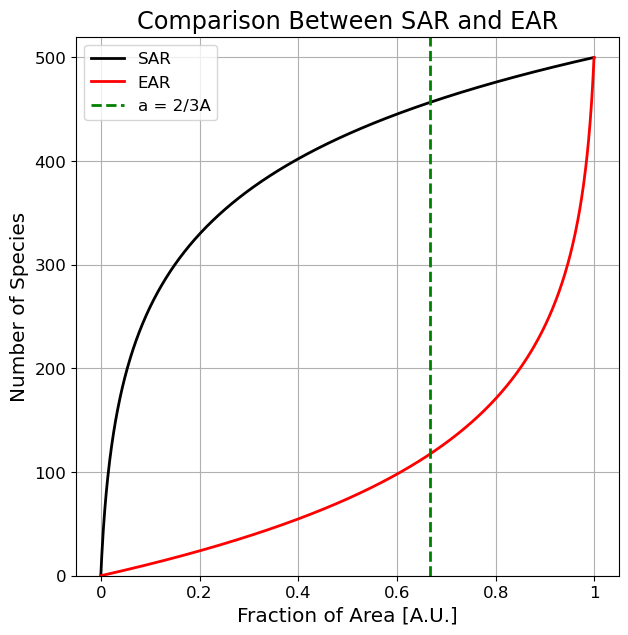

In [3]:
##################### PARAMETERS #####################
S = 500                                           # Number of species
nu = 0.01                                         # Intrinsic birth rate
a_domain = np.linspace(0, 1, num = 1000)          # Subdivisions of the area

sar = SAR(a_domain, nu, S)
ear = EAR(a_domain, nu, S)

##################### PLOTS #####################
plt.figure(figsize = (7, 7))
plt.plot(sar, color = 'black', label = 'SAR', linewidth = 2)
plt.plot(ear, color = 'red', label = 'EAR', linewidth = 2)
plt.vlines(x = 1000 * 2/3, ymin = 0, ymax = 520, color = 'green', linewidth = 2, linestyle = '--', label = 'a = 2/3A')
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Fraction of Area [A.U.]', fontsize = 'x-large')
plt.xticks(ticks = [0, 200, 400, 600, 800, 1000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 'large')
plt.ylim(bottom = 0, top = 520)
plt.ylabel('Number of Species', fontsize = 'x-large')
plt.yticks(fontsize = 'large')
plt.title('Comparison Between SAR and EAR', fontsize = 'xx-large')
plt.grid(True)
plt.show()

In [4]:
sar_2_3 = SAR(2/3, nu, S)
ear_2_3 = EAR(2/3, nu, S)

print(f"Number of species in a = 2/3 A: {sar_2_3:.3f} out of {S}")
print(f"Number of endemic species in a = 2/3 A: {ear_2_3:.3f} out of {S}")

Number of species in a = 2/3 A: 456.519 out of 500
Number of endemic species in a = 2/3 A: 117.130 out of 500


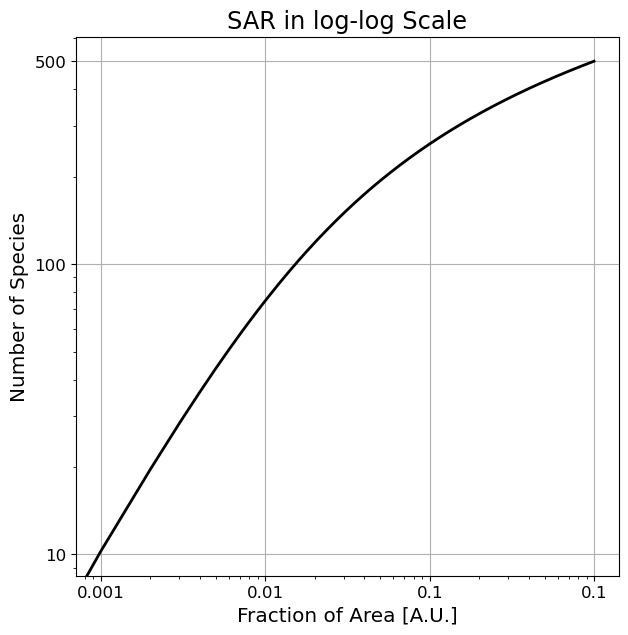

In [5]:
plt.figure(figsize = (7, 7))
plt.plot(sar, color = 'black', label = 'SAR', linewidth = 2)
plt.xlabel('Fraction of Area [A.U.]', fontsize = 'x-large')
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks = [1, 10, 100, 1000], labels = [0.001, 0.01, 0.1, 0.1], fontsize = 'large')
plt.ylabel('Number of Species', fontsize = 'x-large')
plt.yticks(ticks = [10, 100, 500], labels = [10, 100, 500], fontsize = 'large')
plt.title('SAR in log-log Scale', fontsize = 'xx-large')
plt.grid(True)
plt.show()

This behavior is mostly reminiscent of the one seen in empirical SAR plots at the local scale.

<br>

Now, we would like to fit the expression we obtained for the SAR with a power law function:
$$
\text{SAR}_{\text{PL}}(a) = k a^z
$$
with the exponent $z \in [0.2, 0.3]$. The goal is to tune the parameters $k$ and $z$ to obtain the best possible fit. At first, we observe that a good candidate for $k$ is $k = S$, considering that we need to find $\text{SAR}(1) = S$. 

In [6]:
##################### FUNCTIONS #####################
def SAR_pl(a: float, k: float, z: float):
    """
    This function produces the power-law version of the empirical
    SAR distribution:
    
    SAR_pl = k * a ** z
    """
    if np.any(a) > 1 or np.any(a) < 0:
        raise ValueError(f"The size of the subdivision must be greater than zero or lower than one. Used value: {a}")
    if k < 0:
        raise ValueError(f"The multiplicative factor must be greater than zero. Used value: {k}")
    if z < 0 or z > 1:
        raise ValueError(f"The exponent must be greater than zero or lower than one. Used value: {z}")
    sar = k * np.power(a, z)
    return sar

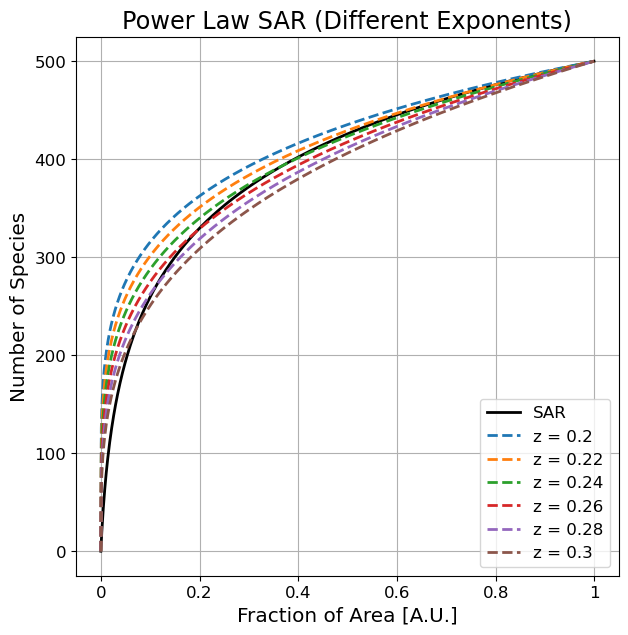

In [7]:
##################### PARAMETERS #####################
k = S
z_domain = [0.2, 0.22, 0.24, 0.26, 0.28, 0.3]
sar_pl_all = np.zeros(shape = (len(z_domain), 1000))

for i, z in enumerate(z_domain):
    sar_pl_all[i, :] = SAR_pl(a_domain, k, z)

##################### PLOTS #####################
plt.figure(figsize = (7, 7))
plt.plot(sar, color = 'black', label = 'SAR', linewidth = 2)
for i in range(len(sar_pl_all)):
    plt.plot(sar_pl_all[i], label = f'z = {z_domain[i]}', linewidth = 2, linestyle = '--')
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Fraction of Area [A.U.]', fontsize = 'x-large')
plt.xticks(ticks = [0, 200, 400, 600, 800, 1000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 'large')
plt.ylabel('Number of Species', fontsize = 'x-large')
plt.yticks(fontsize = 'large')
plt.title('Power Law SAR (Different Exponents)', fontsize = 'xx-large')
plt.grid(True)
plt.show()

The best fitting result seems to lie between $z = 0.22$ and $z = 0.24$. Let us try to make use of the `curve_fit` function of `scipy.optimize`.

In [8]:
popt, _ = curve_fit(SAR_pl, a_domain, sar, p0 = [500, 0.23])
k_best, z_best = popt[0], popt[1]
print(f'Best parameters: k = {k_best:.3f} and z = {z_best:.3f}')

Best parameters: k = 513.924 and z = 0.294


And now we plot these results:

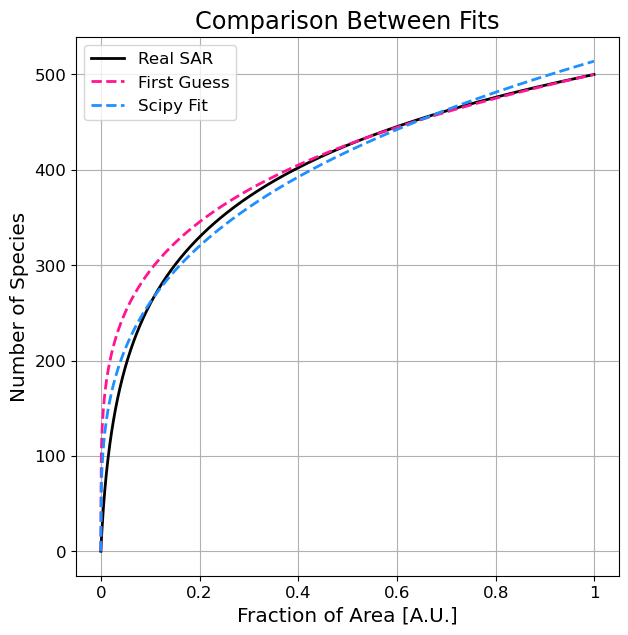

In [9]:
sar_pl_guess = SAR_pl(a_domain, S, 0.23)
sar_pl_best  = SAR_pl(a_domain, k_best, z_best)
sar          = SAR(a_domain, nu, S)

plt.figure(figsize = (7, 7))
plt.plot(sar, color = 'black', label = 'Real SAR', linewidth = 2)
plt.plot(sar_pl_guess, color = 'deeppink', label = 'First Guess', linewidth = 2, linestyle = '--')
plt.plot(sar_pl_best, color = 'dodgerblue', label = 'Scipy Fit', linewidth = 2, linestyle = '--')
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Fraction of Area [A.U.]', fontsize = 'x-large')
plt.xticks(ticks = [0, 200, 400, 600, 800, 1000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 'large')
plt.ylabel('Number of Species', fontsize = 'x-large')
plt.yticks(fontsize = 'large')
plt.title('Comparison Between Fits', fontsize = 'xx-large')
plt.grid(True)
plt.show()

It should be noticed that the exponent $z$ seems to be dependant on the rate $\nu$. Indeed, let us show that, for our first guess of $k = 500$ and $z = 0.23$, which works somewhat fine for the problem at hand, is completely off the mark for different values of $\nu$. For our original simulation, we used $\nu = 0.01$.

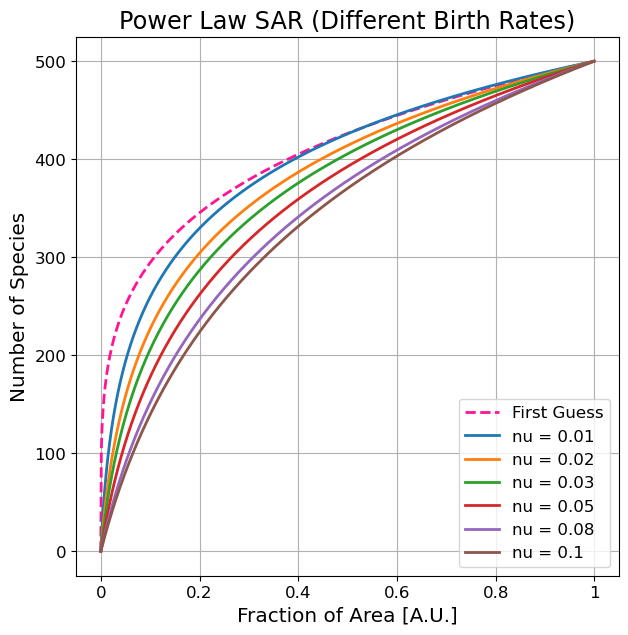

In [10]:
nu_list = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1]
sar_nus = np.zeros(shape = (len(nu_list), 1000))
for i, nu in enumerate(nu_list):
    sar_nus[i, :] = SAR(a_domain, nu, S)

##################### PLOTS #####################
plt.figure(figsize = (7, 7))
plt.plot(sar_pl_guess, color = 'deeppink', label = 'First Guess', linewidth = 2, linestyle = '--')
for i in range(len(sar_nus)):
    plt.plot(sar_nus[i], label = f'nu = {nu_list[i]}', linewidth = 2)
plt.legend(loc = 'best', fontsize = 'large')
plt.xlabel('Fraction of Area [A.U.]', fontsize = 'x-large')
plt.xticks(ticks = [0, 200, 400, 600, 800, 1000], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 'large')
plt.ylabel('Number of Species', fontsize = 'x-large')
plt.yticks(fontsize = 'large')
plt.title('Power Law SAR (Different Birth Rates)', fontsize = 'xx-large')
plt.grid(True)
plt.show()

Let us find the best fitting curve for $\nu = 0.05$ by using `curve_fit`.

In [11]:
sar_05 = SAR(a = a_domain, nu = 0.05, S = S)
popt, _ = curve_fit(SAR_pl, a_domain, sar_05, p0 = [500, 0.35])
k_best_05, z_best_05 = popt[0], popt[1]
print(f'Best parameters: k = {k_best_05:.3f} and z = {z_best_05:.3f}')
print(f'Best parameters in the original case: k = {k_best:.3f} and z = {z_best:.3f}')

Best parameters: k = 516.855 and z = 0.434
Best parameters in the original case: k = 513.924 and z = 0.294
